# **Project Name**    - Netflix Movies And TV Shows Clustering.


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Md Ismail Quraishi

# **Project Summary -**

This is an Unsupervised Machine learning project in this project I will have to build a model that can be capable of clustering different different types of data. The dataset is about netflix shows which has 7787 rows and 12 columns like show_id which represents ID of the show, type represents type of the show, title represents show title, cast represents name of the casting stars, country represents the country of the show, date added represents the date when the show is added to netflix, release_year represents the year the show was released,rating represents the rating of the show, duration represents the length of the show, listed_in tells what type and where the show belongs from, description gives short descriptions about the show. My task is to read and understand the data after that I will have to show some meaningfull charts and explain everything about the chart then according to the visualization chart I will have to make some hypothesis assumptions about the project then testing the assumptions. Then I will handle missing and null values and outliers after completing these all task I will look for imbalanced data if there is any imbalanced data then I will have to deal with that. Then I will select some important features further I will split the data for test and training purpose.

# **Links -**

Clustering : https://github.com/mdismailquraishicse/capstone_project_4_netflix_clustering <br>
Netflix Movies And TV Shows Recommendation System : https://github.com/mdismailquraishicse/NetflixMoviesAndTVShowsRecommendationSystem <br>
Linkedin Post of Recommendation System : https://www.linkedin.com/posts/mdismailquraishicse_hello-connections-i-designed-netflix-movies-activity-7196116867596386305-l70k?utm_source=share&utm_medium=member_desktop

# **Problem Statement**


**My Task is to make a Model that can cluster similar type of content together.**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.decomposition import TruncatedSVD
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset - drive mount and loading dataset
path = './NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

### Dataset First View

In [3]:
# Dataset First Look
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [4]:
# Know your data
print('Shape : ',df.shape)
print()
print('Duplicated row count : ',df.duplicated().sum())
print()
print('Unique count :')
print(df.nunique())
print()
print('Nan/Missing Count : ')
print(df.isna().sum())
print()
print('Unique values in type :', df['type'].unique())
print()
print('Unique values in rating',df['rating'].unique())
print()
print('Info :')
print(df.info())

Shape :  (7787, 12)

Duplicated row count :  0

Unique count :
show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

Nan/Missing Count : 
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Unique values in type : ['TV Show' 'Movie']

Unique values in rating ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id 

In [5]:
# Describe
print('Describe :')
df.describe(include='all')

Describe :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


The dataset has 7787 rows and 12 columns where the column director has 2389, cast has 718, country has 507, date_added has 10 and rating has 7 null values.

The dataset has total 7787 rows and 12 columns:
1. Show_id : show ID
2. type : Type of the show like movie or TV show
3. title : Title of the show
4. director : Director of the show
5. cast : Actors and actress of the show
6. country : Country of the origin of the show
7. date_added : Date when the show added to netflix
8. release_year : Release year
9. rating : rating
10. duration : duration of the show
11. listed_in : Listed in
12. description : Description of the show

## 3. ***Data Wrangling***

### Data Wrangling Code

In [6]:
df['director'] = df['director'].fillna('unknown') # imputing nan with unknown for director
df['cast'] = df['cast'].fillna('unknown') # imputing nan with unknown for cast
df['country'] = df['country'].fillna('na') # imputing nan with na for country
df['rating'] = df['rating'].fillna(df['rating'].describe()['top']) # imputing nan with top for rating
df.drop('date_added',axis=1,inplace=True) # drop date_added column

Imputed nan with unknown in director, cast, na in country, top value in rating and dropped date_added column.

In [7]:
stemmer = SnowballStemmer(language='english') # SnowballStemmer object
def preprocessing(corpus): # Preprocessing function
    """
    this function takes a string and returns the string after preprocessing
    """
    corpus = ''.join([i for i in corpus.lower() if i not in string.punctuation]) # Remove punctuations
    corpus = ''.join([i for i in corpus if i.isnumeric()==False]) # Remove numeric
    corpus = [stemmer.stem(i) for i in corpus.split()] # Stemming
    return ' '.join(corpus)
    
df['new_type'] = df['type'].apply(lambda x:(x.replace(' ','')).lower()) # remove space from type
df['new_director'] = df['director'].apply(lambda x:(x.replace(' ','')).lower()) # remove space from director
df['new_cast'] = df['cast'].apply(lambda x:(x.replace(' ','')).lower()) # remove space from cast
df['new_rating'] = df['rating'].apply(lambda x:(x.replace('-','')).lower()) # remove space from cast
df['new_listed_in'] = df['listed_in'].apply(lambda x:' '.join(x.replace(' ','').split(',')))
# Picking top three cast
df['cast1'] = df['new_cast'].apply(lambda x:x.split(',')[0])
df['cast2'] = df['new_cast'].apply(lambda x:x.split(',')[1] if len(x.split(','))>1 else 'unknown')
df['cast3'] = df['new_cast'].apply(lambda x:x.split(',')[2] if len(x.split(','))>2 else 'unknown')
df['new_cast'] = df['new_cast'].apply(lambda x: x.replace(',',' '))
df['tags'] = df['new_type']+' '+df['new_cast']+' '+df['new_rating']+' '+df['description']+' '+df['country']+' '+df['new_listed_in'] # Tags creation
df['tags'] = df['tags'].apply(preprocessing) # Apply preprocessing function

In [8]:
# Vectorization
cv = CountVectorizer(stop_words='english',min_df=0.05,max_df=0.30) # CountVectorizer object creation
vectors = cv.fit_transform(df['tags']) # Token creation
truncatedSVD = TruncatedSVD() # Singular Value decomposition
vectorsTruncated=truncatedSVD.fit_transform(vectors) # Fit SVD
print(vectors.shape) # Print Shape of the tokens

(7787, 32)


## ML Model Implementation

### ML Model - 1 - KMeans

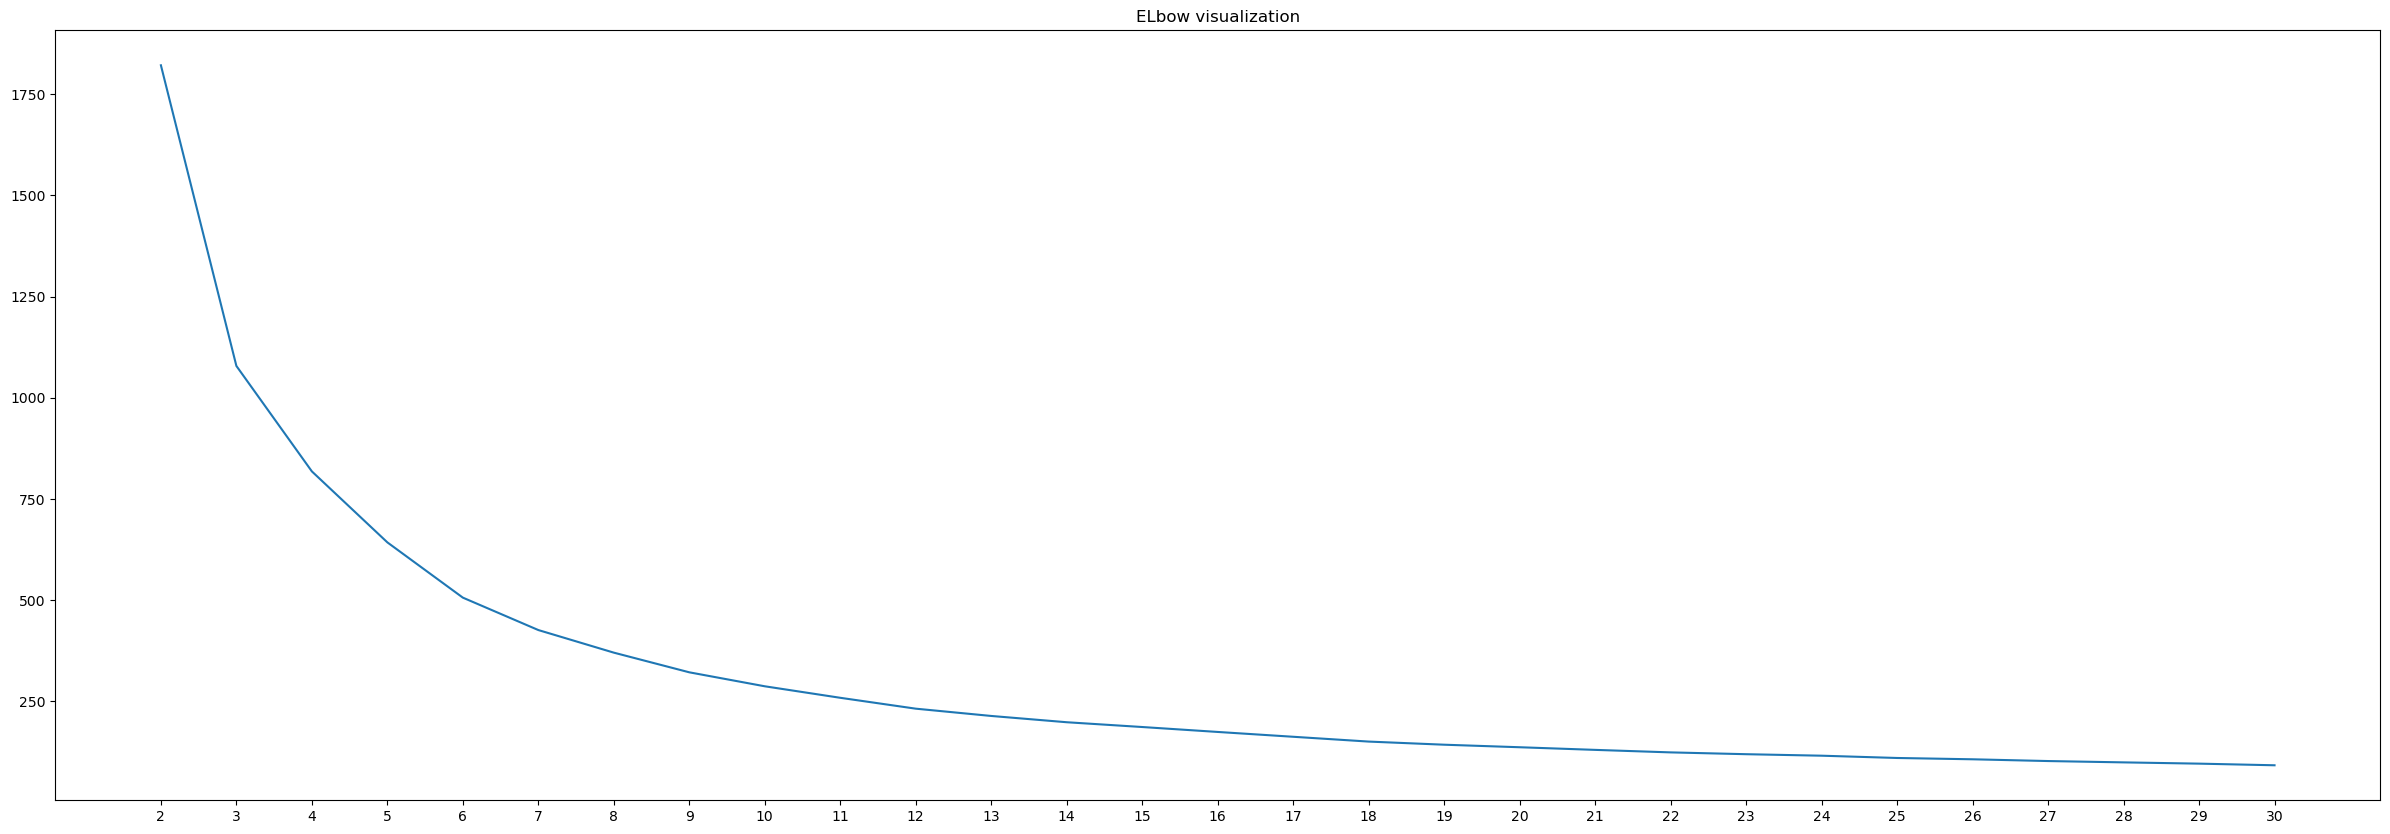

In [9]:
plt.rcParams['figure.figsize'] = (30,10)
weight = []
start = 2
end = 31
for k in range(start,end,1):
    kmeans = KMeans(n_clusters=k,random_state=1, init='k-means++', max_iter=500)
    kmeans.fit(vectorsTruncated)
    weight.append(kmeans.inertia_)
# Visualization
plt.plot(np.arange(2,end), weight)
plt.xticks(np.arange(2,end,1))
plt.title('ELbow visualization')
plt.show()

Slop is constant after k=10

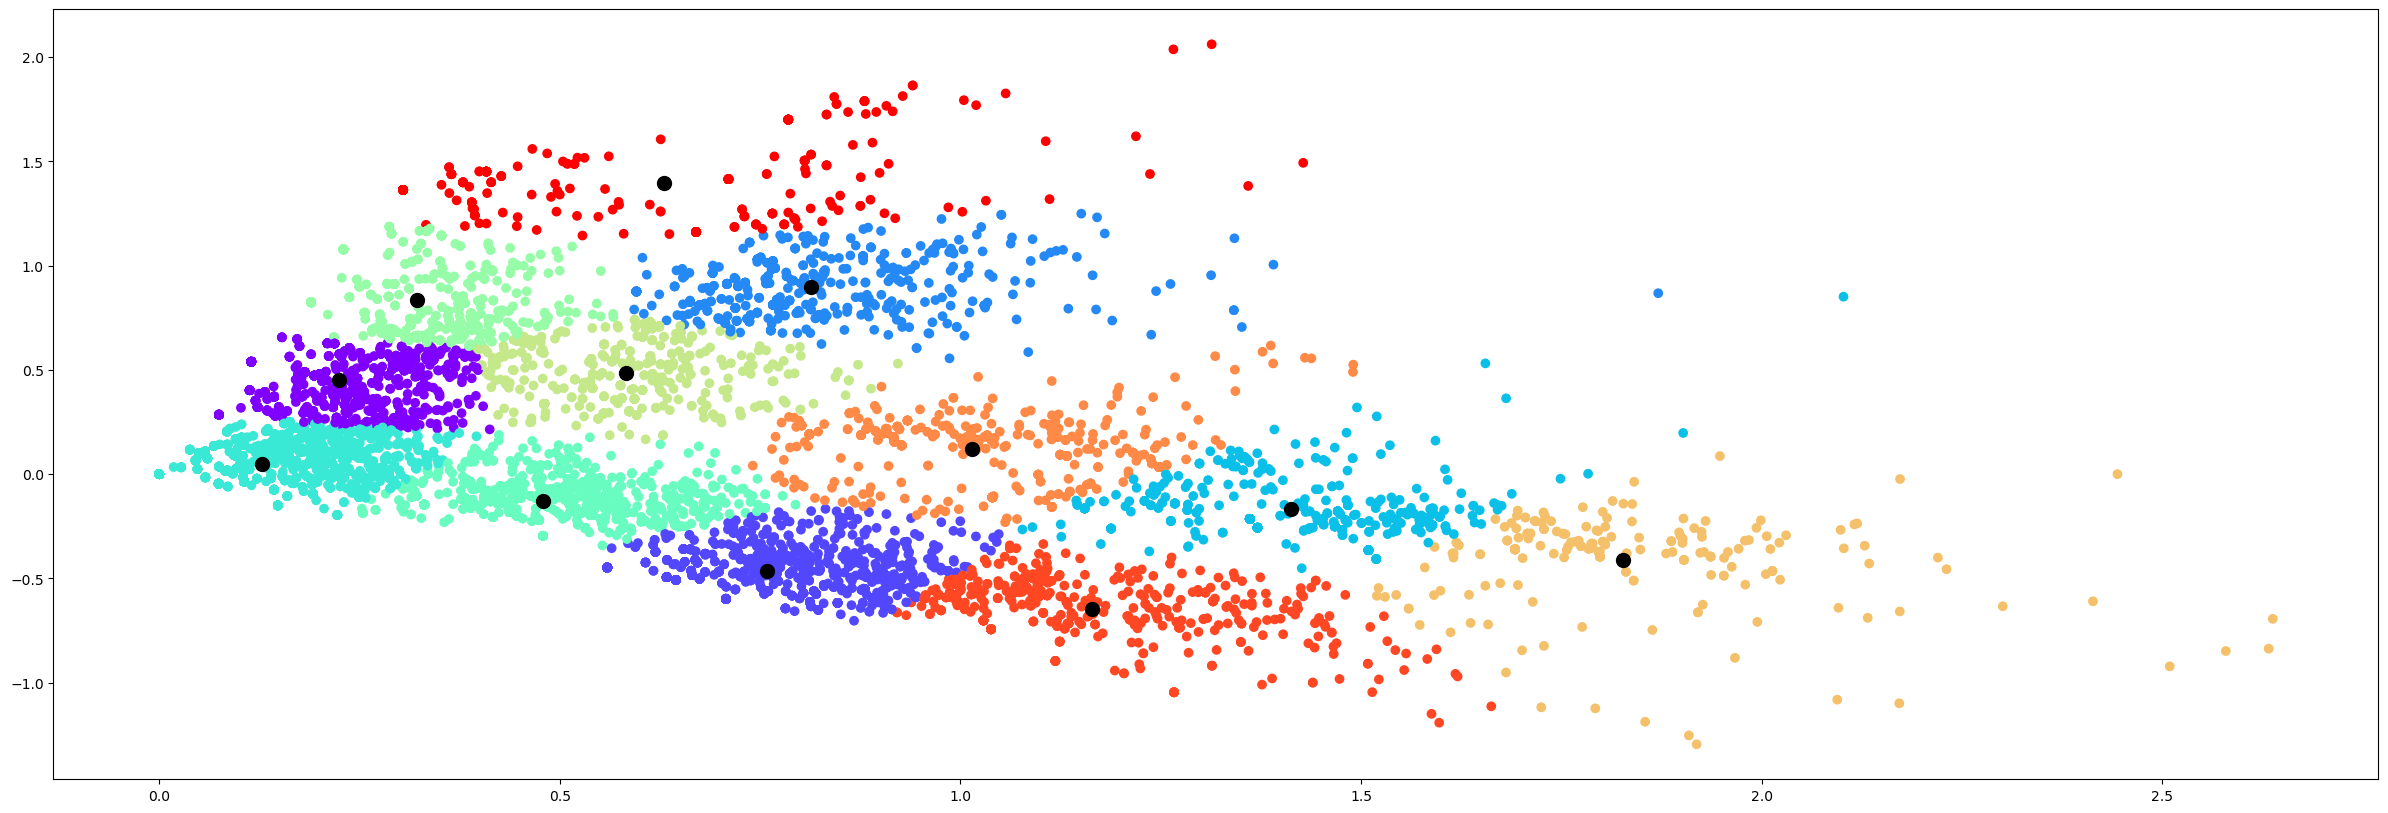

In [10]:
# Fitting Kmeans for k = 4
kmeans = KMeans(n_clusters=12,random_state=1, init='k-means++', max_iter=500) # Kmeans taking n_clusters = 12
df['kmean_labels'] = kmeans.fit_predict(vectorsTruncated) # Model fitting
# Visualization
plt.scatter(vectorsTruncated[:,0],vectorsTruncated[:,1],c=kmeans.labels_, cmap='rainbow') # Scatter plots
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroid')
plt.show()

### ML Model - 2 - Agglomerative Clustering

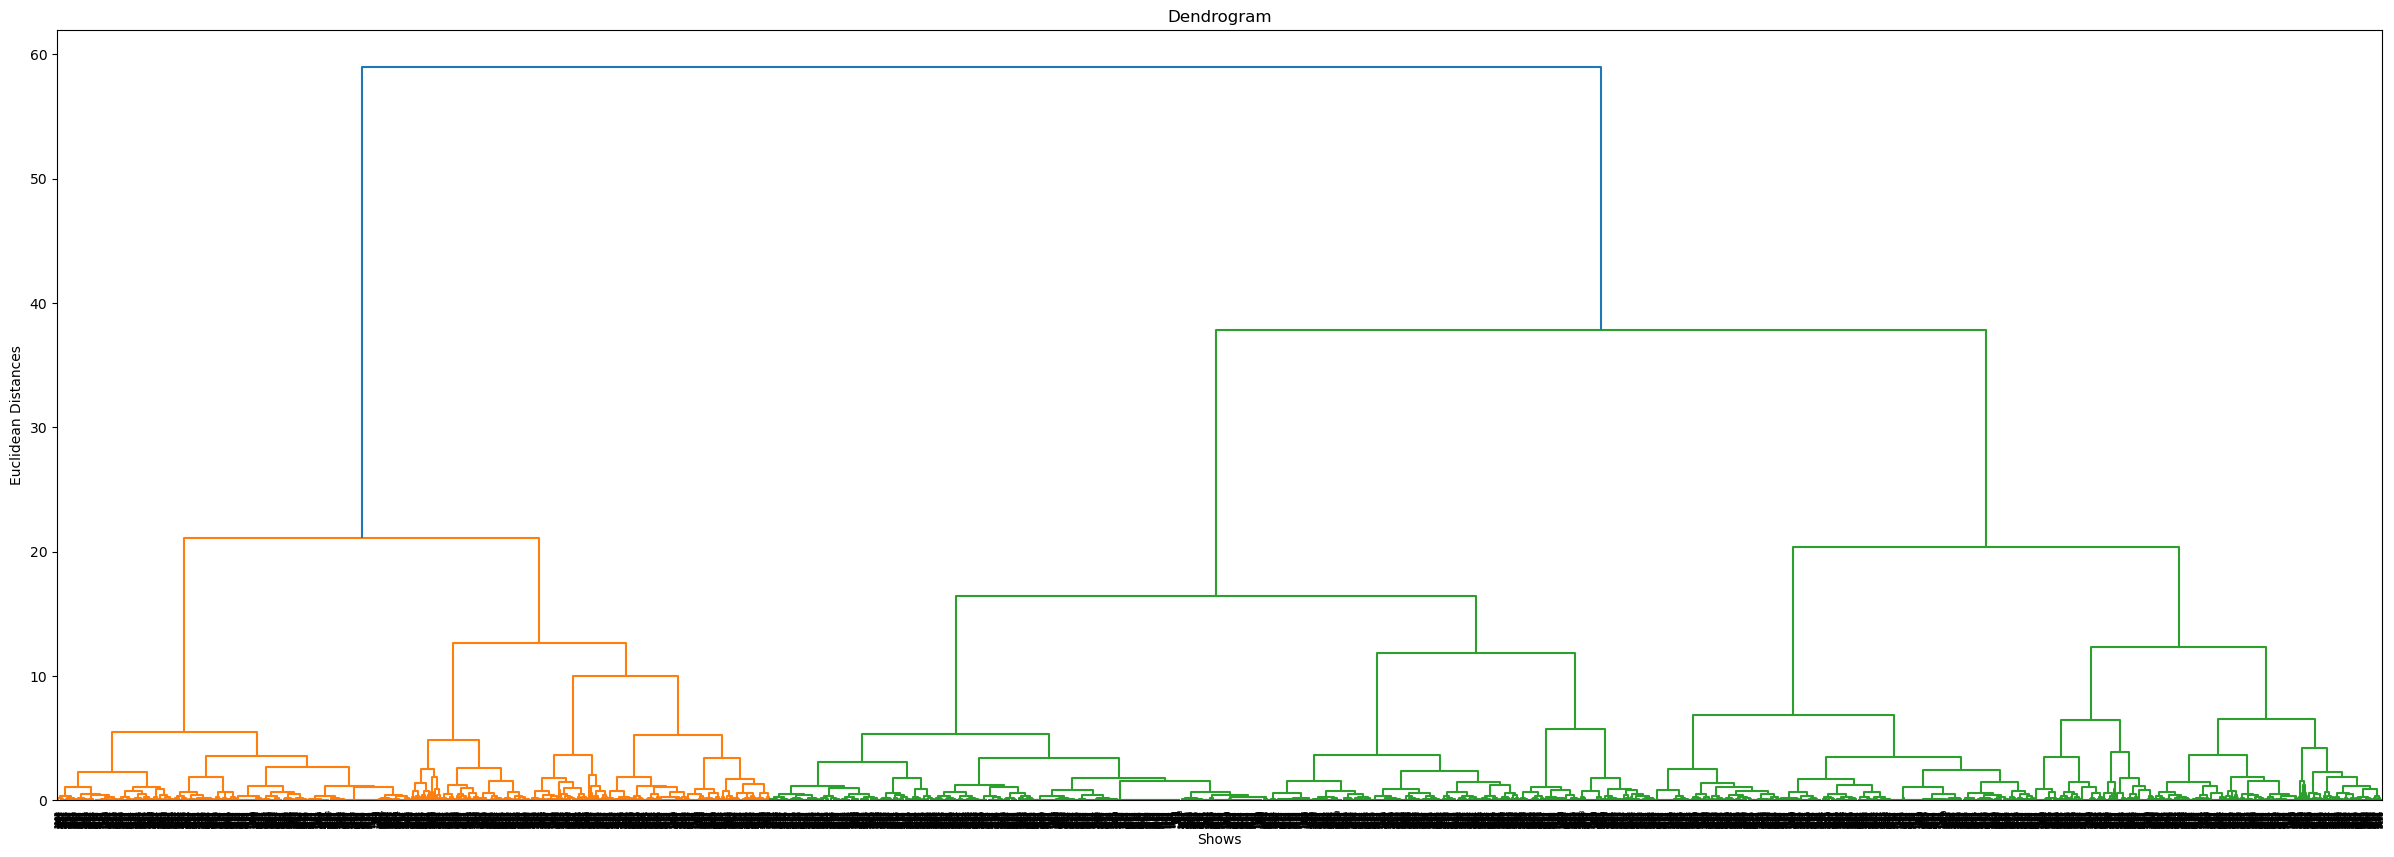

In [11]:
# Using the dendogram to find the optimal number of clusters - and find largest vertical distance we can make without crossing any other horizontal line
linkage =sch.linkage(vectorsTruncated, method = 'ward')
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrogram')
plt.xlabel('Shows')
plt.ylabel('Euclidean Distances')
plt.show() 

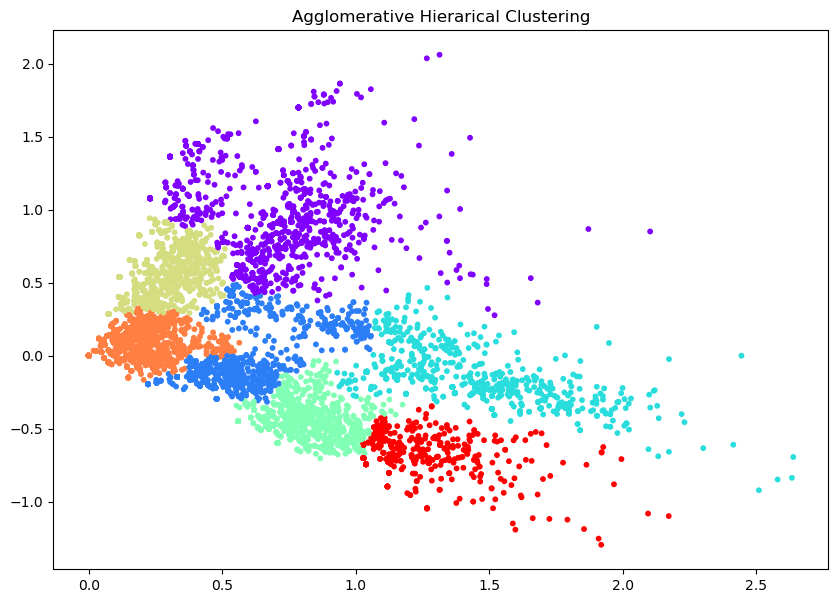

In [12]:
cluster_hierarcial = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
prediction = cluster_hierarcial.fit_predict(vectorsTruncated)
hiearachy_labels = cluster_hierarcial.labels_

plt.figure(figsize=(10, 7))
plt.scatter(vectorsTruncated[:, 0], vectorsTruncated[:, 1], c=hiearachy_labels, cmap='rainbow',s=10)
plt.title('Agglomerative Hierarical Clustering')
plt.show()
df['hierarical_labels'] = prediction

Using Dendogram plot I found n_clusters = 7 is good.

# **Conclusion**

From these two models I would go with kmeans clustering because it is fast and both the models are giving almost same clusters.